In [1]:
import mne
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read data from "derivatives/sub-xp101/eeg_pp/sub-xp101_task-motorloc_eeg_pp.vhdr"
data=mne.io.read_raw_brainvision('C:/Users/ernes/Desktop/Master/Course 21-22/2nd term 21-22/Neuroimage/Week 6/derivatives/sub-xp101/eeg_pp/sub-xp101_task-motorloc_eeg_pp.vhdr')

Extracting parameters from C:/Users/ernes/Desktop/Master/Course 21-22/2nd term 21-22/Neuroimage/Week 6/derivatives/sub-xp101/eeg_pp/sub-xp101_task-motorloc_eeg_pp.vhdr...
Setting channel info structure...


C:\Users\ernes\AppData\Local\Temp\ipykernel_2684\1065157058.py:7: RuntimeWarning: No coordinate information found for channels ['ECG']. Setting channel types to misc. To avoid this warning, set channel types explicitly.
  data=mne.io.read_raw_brainvision('C:/Users/ernes/Desktop/Master/Course 21-22/2nd term 21-22/Neuroimage/Week 6/derivatives/sub-xp101/eeg_pp/sub-xp101_task-motorloc_eeg_pp.vhdr')
C:\Users\ernes\AppData\Local\Temp\ipykernel_2684\1065157058.py:7: RuntimeWarning: Not setting position of 1 misc channel found in montage:
['ECG']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  data=mne.io.read_raw_brainvision('C:/Users/ernes/Desktop/Master/Course 21-22/2nd term 21-22/Neuroimage/Week 6/derivatives/sub-xp101/eeg_pp/sub-xp101_task-motorloc_eeg_pp.vhdr')


In [2]:
%matplotlib tk
data.plot()
data.info

Using qt as 2D backend.
Opening raw-browser...


<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T7, T8, P7, ...
 chs: 63 EEG, 1 misc
 custom_ref_applied: False
 dig: 63 items (63 EEG)
 highpass: 0.0 Hz
 lowpass: 100.0 Hz
 meas_date: 2015-08-14 14:25:22 UTC
 nchan: 64
 projs: []
 sfreq: 200.0 Hz
>

In [3]:
data_filt=data.copy().load_data().filter(0.1,30)
data_filt.plot()
data_filt.info

Reading 0 ... 67387  =      0.000 ...   336.935 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 6601 samples (33.005 sec)

Opening raw-browser...


<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T7, T8, P7, ...
 chs: 63 EEG, 1 misc
 custom_ref_applied: False
 dig: 63 items (63 EEG)
 highpass: 0.1 Hz
 lowpass: 30.0 Hz
 meas_date: 2015-08-14 14:25:22 UTC
 nchan: 64
 projs: []
 sfreq: 200.0 Hz
>

In [4]:
for i in [20,22,24,26,34,40,42,48]:
    print(data.ch_names[i])
#names of the reference channels of the EEG used by the authors

FC1
CP1
FC5
CP5
C1
FC3
CP3
C5


In [5]:
events=mne.events_from_annotations(data_filt) #extract the events from the data
events 

Used Annotations descriptions: ['New Segment/', 'Pulse Artifact/R', 'Response/R128', 'Stimulus/S  1', 'Stimulus/S 99', 'TPULSE/TEND', 'TPULSE/TPEAK', 'TPULSE/TSTART']


(array([[    0,     0, 99999],
        [ 2230,     0,  1128],
        [ 2249,     0, 10001],
        ...,
        [67030,     0,  1128],
        [67075,     0, 10001],
        [67227,     0, 10001]]),
 {'New Segment/': 99999,
  'Pulse Artifact/R': 10001,
  'Response/R128': 1128,
  'Stimulus/S  1': 1,
  'Stimulus/S 99': 99,
  'TPULSE/TEND': 10002,
  'TPULSE/TPEAK': 10003,
  'TPULSE/TSTART': 10004})

In [6]:
task=events[0][events[0][:,2]==1] #task
task_time=task[:,0:1]/200 #divide the samples between sampling frequency (200 Hz) to obtain time in seconds
task_time

array([[ 31.26 ],
       [ 71.33 ],
       [111.4  ],
       [151.45 ],
       [191.485],
       [231.54 ],
       [271.59 ],
       [311.62 ]])

In [7]:
rest=events[0][events[0][:,2]==99] #rest
rest_time=rest[:,0:1]/200 #divide the samples between sampling frequency (200 Hz) to obtain time in seconds
rest_time=np.append(rest_time,task_time[-1] + 20) #add the end value of the time series to have same length with task_time
rest_time

array([ 51.3  ,  91.365, 131.435, 171.47 , 211.505, 251.555, 291.605,
       331.62 ])

In [25]:
# time=np.concatenate((task_time,rest_time))
# time=np.squeeze(time)
# time=np.sort(time)
# time=np.append(time,time[-1] + 20) #add the end value of the time series summing 20 seconds
# time

In [8]:
#Create a new channel called stimulation (STI) needed to add the events
stim=mne.create_info(['STI'],200,['stim'])
stim_raw=mne.io.RawArray(np.zeros([1,67388]),stim) #AUTOMATITZAR!
data_filt.load_data().add_channels([stim_raw],force_update_info=True)

Creating RawArray with float64 data, n_channels=1, n_times=67388
    Range : 0 ... 67387 =      0.000 ...   336.935 secs
Ready.


<RawBrainVision | sub-xp101_task-motorloc_eeg_pp.dat, 65 x 67388 (336.9 s), ~33.5 MB, data loaded>

In [9]:
data_filt.add_events(events[0],stim_channel='STI',replace=True) #add the events to the data
# data_filt.ch_names #see the STI channel at the end

In [26]:
# # ALTERNATIVA 1 NOT USED
# event_id = {'task':1,'rest':99} #take the value of the 'Stimulus/S 10001': 10001
# tmin = 2  # start of each epoch (200ms before the trigger)
# tmax = 18  # end of each epoch (500ms after the trigger) 
# data_filt.info['bads'] = ['ECG'] # ECG is a bad channel
# baseline = (2,3)

In [27]:
# reject_criteria = dict(eeg=600e-5)      
# # picks = mne.pick_types(data_filt.info, meg=False, eeg=True, stim=False, misc=True,
# #                        include=[])
# picks = mne.pick_types(data_filt.info, meg=False, eeg=True, stim=False, misc=True,
#                        include=[], exclude='bads')

In [28]:
# epochs = mne.Epochs(data_filt, events[0], event_id, tmin, tmax, picks=picks, proj=False,
#                     baseline=baseline, reject=reject_criteria)

Not setting metadata
15 matching events found
Applying baseline correction (mode: mean)


In [31]:
# https://mne.tools/stable/auto_examples/visualization/topo_compare_conditions.html
# Generate list of evoked objects from conditions names
evokeds = [epochs[name].load_data().set_eeg_reference().average() for name in ('task', 'rest')]

# Show topography for different states
from mne.viz import plot_evoked_topo

colors = 'blue', 'red'
title = 'EEG data\ntask vs rest'

plot_evoked_topo(evokeds, color=colors, title=title, background_color='w')

plt.show()

Using data from preloaded Raw for 8 events and 3201 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Using data from preloaded Raw for 7 events and 3201 original time points ...
0 bad epochs dropped
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


In [26]:
# ALTERNATIVA 2

epochs_list_task=[0 for i in range(0, len(task_time)-1)] #create a list of zeros for the task
epochs_list_rest=[0 for i in range(0, len(rest_time)-1)] #create a list of zeros for the rest

for j in range(len(task_time)-1):
    epochs_list_task[j]= mne.make_fixed_length_epochs(data_filt.copy().crop(tmin=round(float(task_time[j]),1), tmax=round(float(rest_time[j]),1)))

for k in range(len(rest_time)-1):
    epochs_list_rest[k]= mne.make_fixed_length_epochs(data_filt.copy().crop(tmin=round(float(rest_time[k]),1), tmax=round(float(task_time[k+1]),1)))
       
epochs_task=mne.concatenate_epochs(epochs_list_task)
epochs_rest=mne.concatenate_epochs(epochs_list_rest)

Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
20 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
20 matching events found


C:\Users\ernes\AppData\Local\Temp\ipykernel_2684\990757225.py:12: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs_task=mne.concatenate_epochs(epochs_list_task)
C:\Users\ernes\AppData\Local\Temp\ipykernel_2684\990757225.py:13: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  epochs_rest=mne.concatenate_epochs(epochs_list_rest)


0 bad epochs dropped
Using data from preloaded Raw for 20 events and 200 original time points ...
Using data from preloaded Raw for 20 events and 200 original time points ...
Using data from preloaded Raw for 20 events and 200 original time points ...
Using data from preloaded Raw for 20 events and 200 original time points ...
Using data from preloaded Raw for 20 events and 200 original time points ...
Using data from preloaded Raw for 20 events and 200 original time points ...
Using data from preloaded Raw for 20 events and 200 original time points ...
Not setting metadata
140 matching events found
No baseline correction applied
0 bad epochs dropped


In [ ]:
epochs_task.plot()

In [30]:
epochs_task.load_data().set_eeg_reference(ref_channels= ["FC1","CP1","FC5","CP5","C1","FC3","CP3","C5"]).plot()

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Opening epochs-browser...


In [ ]:
epochs_rest.plot()

In [ ]:
epochs_rest.load_data().set_eeg_reference(ref_channels= ["FC1","CP1","FC5","CP5","C1","FC3","CP3","C5"]).plot()

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


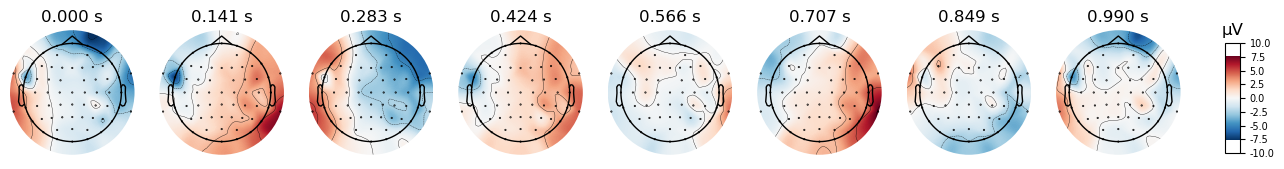

In [31]:
evoked_task = epochs_task.set_eeg_reference(ref_channels= ["FC1","CP1","FC5","CP5","C1","FC3","CP3","C5"]).average() #mean of the epochs to get the evoked response
evoked_task.plot(time_unit='s', gfp=True) #plot of the evoked response
evoked_task.plot_topomap(times=np.linspace(0,0.99,8), ch_type='eeg',time_unit='s')

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


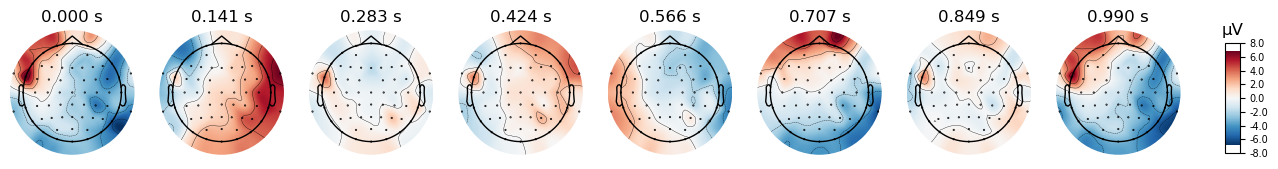

In [32]:
evoked_rest = epochs_rest.set_eeg_reference(ref_channels= ["FC1","CP1","FC5","CP5","C1","FC3","CP3","C5"]).average() #mean of the epochs to get the evoked response
evoked_rest.plot(time_unit='s', gfp=True) #plot of the evoked response
evoked_rest.plot_topomap(times=np.linspace(0,0.99,8), ch_type='eeg',time_unit='s')

No projector specified for this dataset. Please consider the method self.add_proj.


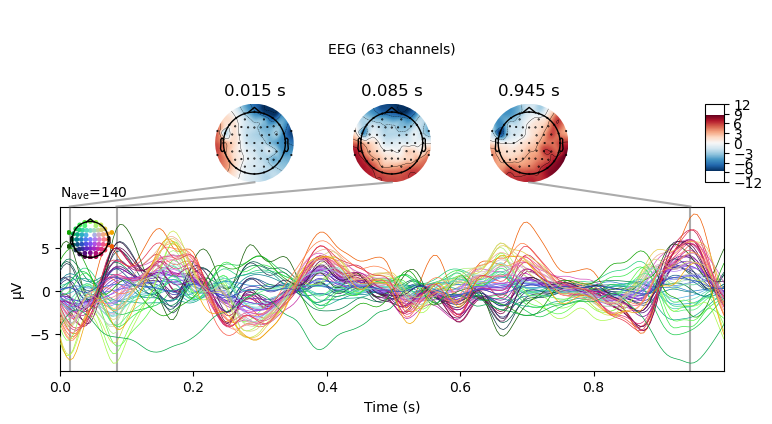

In [33]:
mne.viz.plot_evoked_joint(evoked_task)

No projector specified for this dataset. Please consider the method self.add_proj.


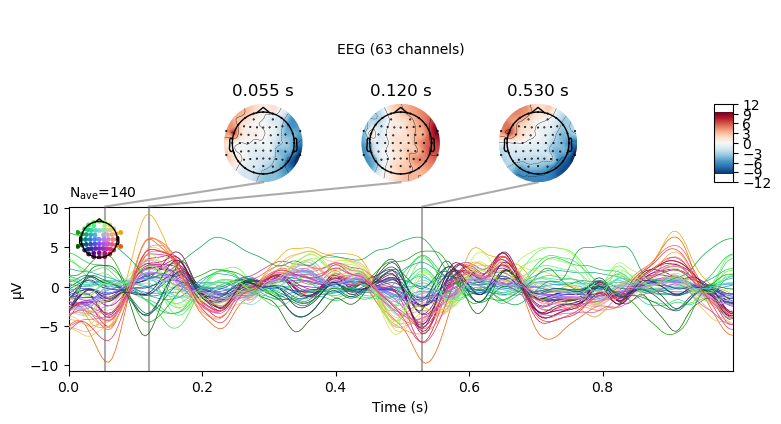

In [42]:
mne.viz.plot_evoked_joint(evoked_rest)

In [41]:
# https://mne.tools/stable/auto_examples/visualization/topo_compare_conditions.html
# Generate list of evoked objects from conditions names
evokeds = [evoked_task,evoked_rest]

# Show topography for different states
from mne.viz import plot_evoked_topo

colors = 'blue', 'red'
title = 'EEG data\ntask (blue) vs rest (red)'

plot_evoked_topo(evokeds, color=colors, title=title, background_color='w')

plt.show()

In [45]:
# Comparing evoked objects
def custom_func(x):
    return x.max(axis=1)


for combine in ('mean', 'median', 'gfp', custom_func):
    mne.viz.plot_compare_evokeds(evokeds, picks='eeg', combine=combine)

combining channels using "mean"
combining channels using "mean"
combining channels using "median"
combining channels using "median"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "<function custom_func at 0x0000014A2FEA3D90>"
combining channels using "<function custom_func at 0x0000014A2FEA3D90>"
